In [1]:
import pandas as pd
import numpy as np
import collections

data = pd.read_csv("sothebys_historical_data.csv", warn_bad_lines=True, error_bad_lines=False)
print data.columns

Skipping line 225573: expected 18 fields, saw 27



Index([u'Sale Name', u'Sale Date', u'Sale Location', u'Sale Number',
       u'Lot Number', u'Lot Title', u'Lot Description', u'High Estimate',
       u'Low Estimate', u'Price', u'Currency', u'Status', u'Maker',
       u'Image URL', u'Provenance', u'Literature', u'Notes', u'URL'],
      dtype='object')


/Users/gzhao/Library/Python/2.7/lib/python/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%m/%d/%Y', errors='coerce')
data.index = data['Sale Date']
data = data.sort('Sale Date')

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [4]:
print len(data)
data = data[pd.notnull(data['Sale Date'])]
print len(data)

458708
455324


In [5]:
data['Year'] = pd.DatetimeIndex(data['Sale Date']).year

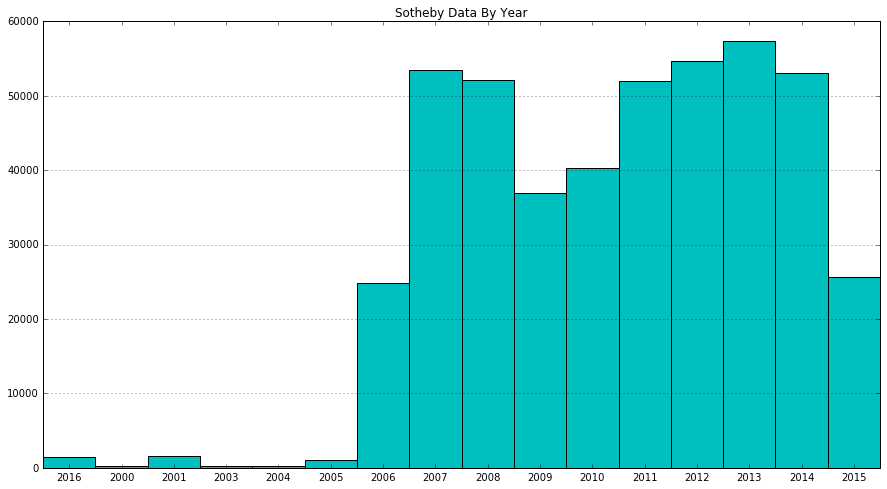

In [6]:
counter = collections.Counter(data['Year'])

plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(counter.values())), counter.values(), 1.0, color = 'c')
plt.xticks(np.arange(len(counter.values())) + 0.5, counter.keys())
plt.gca().yaxis.grid(True)
plt.title('Sotheby Data By Year')

In [7]:
counter = collections.Counter(data['Image URL'])

print counter.most_common(3)
print sum(sorted(counter.values())[-2:])/float(len(data))

[('http://www.sothebys.com/content/dam/default/underCopyright.jpg', 76144), ('http://www.sothebys.com/content/dam/sothebys/default/lot.jpg', 56211), ('http://www.sothebys.com/content/dam/sothebys-pages/auction-sales-recirc/2014/04/HK0527_auctionlist.jpg', 1600)]
0.290683117956


In [8]:
sample = data.sample(n =10)
print np.array(sample['URL'])

[ 'http://www.sothebys.com/en/auctions/ecatalogue/2008/latin-american-art-n08493/lot.77.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2012/russianpaintings/lot.204.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2014/finest-rarest-wines-l14712/lot.553.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2007/european-collections-paintings-ceramics-glass-furniture-and-other-works-of-art-am1028/lot.1024.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2008/modern-and-contemporary-southeast-asian-paintings-hk0275/lot.866.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2009/american-indian-art-including-property-from-the-collection-of-frieda-and-milton-rosenthal-n08554/lot.33.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2006/a-celebration-of-the-english-country-house-furniture-silver-ceramics-n08177/lot.179.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2014/a-table-pf1460/lot.182.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2008/t